<a href="https://colab.research.google.com/github/kiettrantuan3007/AI_at_school/blob/main/MNIST/MNIST_backpropagation_2hidden_layer_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install ipython


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.8 MB/s eta 0:00:00


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# label store as the value of output 
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
# normallize the input

x_train = np.reshape(x_train, (60000, 784))/255.0
x_test = np.reshape(x_test, (10000, 784))/255.0

# convert the value of label to the argmax array by np.eye

y_train = np.matrix(np.eye(10)[y_train])
y_test = np.matrix(np.eye(10)[y_test])


In [5]:
#define the function 
# 1. mean this is a matrix with full 1
def sigmoid(x):
  return 1./(1.+np.exp(-x))
def softmax(x):
  return np.divide(np.matrix(np.exp(x)), np.mat(np.sum(np.exp(x), axis=1)))
def relu(x):
  return np.maximum(x, 0)
def gradient_relu(x):
  temp = x
  temp[temp>=0] = 1
  temp[temp<0] = 0
  return temp

In [6]:
def Forwardpass2HiddenLayer(X, Wh1, bh1, Wh2, bh2, Wo, bo):
  zh1 = X@Wh1.T + bh1
  a1 = relu(zh1)
  zh2 = a1@Wh2.T + bh2
  a2 = sigmoid(zh2)
  z = a2@Wo.T+bo
  o=softmax(z)
  return o

In [7]:
def Forwardpass(X,Wh,bh,Wo,bo):
  zh= X@Wh.T+ bh
  a = sigmoid(zh)
  z=a@Wo.T+ bo
  o = softmax(z)
  return o

In [8]:
# np.argmax return the index of maximum value in the nparray, to convert the softmax array back to value 

def AccTest(label, prediction):
  OutMaxArg=np.argmax(prediction, axis=1)
  LabelMaxArg=np.argmax(label, axis=1)
  Accuracy=np.mean(OutMaxArg==LabelMaxArg)
  return Accuracy

In [18]:
learningRate = 0.1
epoch = 50
NumTrainSamples = 60000
NumTestSamples = 10000

NumInput = 784
NumHidden_1_Unit = 512
NumHidden_2_Unit = 512
NumClasses = 10

# initial the input-hidden
# np.random.uniform(a,b,(sizeX, sizeY)) to random number from a to b with the sizeXY
Wh1 = np.matrix(np.random.uniform(-0.5, 0.5, (NumHidden_1_Unit, NumInput)))
bh1 = np.random.uniform(0, 0.5, (1, NumHidden_1_Unit))
# initial the value of derivative (or gradient)
dWh1 = np.zeros((NumHidden_1_Unit, NumInput))
dbh1 = np.zeros((1, NumHidden_1_Unit))

Wh2 = np.matrix(np.random.uniform(-0.5, 0.5, (NumHidden_2_Unit, NumHidden_1_Unit)))
bh2 = np.random.uniform(0, 0.5, (1, NumHidden_2_Unit))
# initial the value of derivative (or gradient)
dWh2 = np.zeros((NumHidden_2_Unit, NumHidden_1_Unit))
dbh2 = np.zeros((1, NumHidden_2_Unit))


# the same with the hidden-output layer
# np.random.uniform(a,b,(sizeX, sizeY)) to random number from a to b with the sizeXY
Wo = np.matrix(np.random.uniform(-0.5, 0.5, (NumClasses, NumHidden_2_Unit)))
bo = np.random.uniform(0, 0.5, (1, NumClasses))
# initial the value of derivative (or gradient)
dWo = np.zeros((NumClasses, NumHidden_2_Unit))
dbo = np.zeros((1, NumClasses))

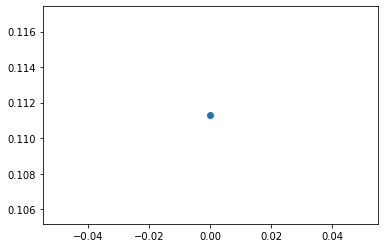

KeyboardInterrupt: ignored

In [ ]:
from IPython.display import clear_output
loss = []
Acc = []
for ep in range(epoch):
#feed fordwarepropagation
  x = x_train
  y = y_train

  zh1 = x@Wh1.T + bh1
  a1 = relu(zh1)
  zh2 = a1@Wh2.T + bh2
  a2 = sigmoid(zh2)
  z = a2@Wo.T+bo
  o=softmax(z)
  #calculate loss
  loss.append(-np.sum(np.multiply(y,np.log10(o))))
  #calculate the error for the ouputlayer
  d2 = o-y
  #Back propagate error
  dh2 = d2@Wo
  dhs2= np.multiply(np.multiply(dh2,a2),(1-a2))

  dh1 = dhs2@Wh2
  dhs1= np.multiply(dh1, gradient_relu(a1))
  #update weight
  dWo= np.matmul(np.transpose(d2),a2)
  dbo= np.mean(d2) # consider a is 1 for bias
  dWh2= np.matmul(np.transpose(dhs2),a1)
  dbh2= np.mean(dhs1) # consider a is 1 for bias
  dWh1= np.matmul(np.transpose(dhs1),x)
  dbh1= np.mean(dhs2) # consider a is 1 for bias
  Wo =Wo -learningRate*dWo/NumTrainSamples
  bo=bo-learningRate*dbo
  Wh2=Wh2-learningRate*dWh2/NumTrainSamples
  bh2=bh2-learningRate*dbh2
  Wh1=Wh1-learningRate*dWh1/NumTrainSamples
  bh1=bh1-learningRate*dbh1
  #Test accuracy with random innitialweights
  # prediction = Forwardpass(x_test,Wh,bh,Wo,bo)
  prediction = Forwardpass2HiddenLayer(x_test,Wh1,bh1,Wh2, bh2, Wo,bo)
  Acc.append(AccTest(y_test,prediction))
  clear_output(wait=True)
  plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
  plt.show()
  

In [ ]:
prediction = Forwardpass2HiddenLayer(x_test,Wh1,bh1,Wh2, bh2, Wo,bo)
Rate = AccTest(y_test, prediction)
print(Rate)

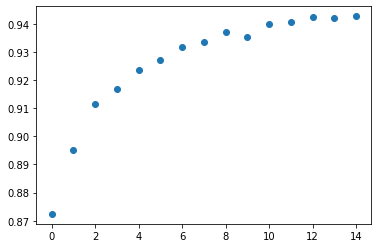

In [19]:
epoch = 15

loss = []
Acc= []
AccNoMomentum =[]
Batch_size= 200
Stochastic_samples= np.arange(NumTrainSamples)
for ep in range(epoch):
  np.random.shuffle(Stochastic_samples)
  for ite in range(0,NumTrainSamples,Batch_size):
  #feed fordwarepropagation
    Batch_samples= Stochastic_samples[ite:ite+Batch_size]
    x = x_train[Batch_samples,:]
    y = y_train[Batch_samples,:]
    zh1 = x@Wh1.T + bh1
    a1 = relu(zh1)
    zh2 = a1@Wh2.T + bh2
    a2 = sigmoid(zh2)
    z = a2@Wo.T+bo
    o=softmax(z)
    #calculate loss
    loss.append(-np.sum(np.multiply(y,np.log10(o))))
    #calculate the error for the ouputlayer
    d2 = o-y
    #Back propagate error
    dh2 = d2@Wo
    dhs2= np.multiply(np.multiply(dh2,a2),(1-a2))

    dh1 = dhs2@Wh2
    dhs1= np.multiply(dh1, gradient_relu(a1))
    #update weight

    dWo= np.matmul(np.transpose(d2),a2)
    dbo= np.mean(d2) # consider a is 1 for bias
    dWh2= np.matmul(np.transpose(dhs2),a1)
    dbh2= np.mean(dhs1) # consider a is 1 for bias
    dWh1= np.matmul(np.transpose(dhs1),x)
    dbh1= np.mean(dhs2) # consider a is 1 for bias


    Wo =Wo -learningRate*dWo/Batch_size
    bo=bo-learningRate*dbo
    Wh2=Wh2-learningRate*dWh2/Batch_size
    bh2=bh2-learningRate*dbh2
    Wh1=Wh1-learningRate*dWh1/Batch_size
    bh1=bh1-learningRate*dbh1


    
    #Test accuracy with random innitial weights
  prediction = Forwardpass2HiddenLayer(x_test,Wh1,bh1,Wh2, bh2, Wo,bo)
  Acc.append(AccTest(y_test,prediction))
  print('Epoch:', ep )
  print('Accuracy:',AccTest(y_test,prediction) )
  clear_output(wait=True)
  plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
  plt.show()


In [ ]:
Wo.astype('float16').tofile('wo.txt')